In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [5]:
df = pd.read_csv('../data/bank-additional-full.csv', sep=";")


### Bank Marketing
1. Abstract:
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

2. Data Set Information:
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

- Attribute Information 

- Bank client data:

    Age (numeric)

    Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')

    Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)

    Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')

    Default: has credit in default? (categorical: 'no', 'yes', 'unknown')

    Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')

    Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

    Related with the last contact of the current campaign:

    Contact: contact communication type (categorical:'cellular','telephone')

    Month: last contact month of year (categorical: 'jan', 'feb', 'mar',
    …, 'nov', 'dec')

    Dayofweek: last contact day of the week (categorical:
    'mon','tue','wed','thu','fri')

    Duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known.

    Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

- Other attributes:

    Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

    Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

    Previous: number of contacts performed before this campaign and for this client (numeric)

    Poutcome: outcome of the previous marketing campaign (categorical:'failure','nonexistent','success')
    Social and economic context attributes
    Emp.var.rate: employment variation rate - quarterly indicator (numeric)

    Cons.price.idx: consumer price index - monthly indicator (numeric)

    Cons.conf.idx: consumer confidence index - monthly indicator (numeric)

    Euribor3m: euribor 3 month rate - daily indicator (numeric)

    Nr.employed: number of employees - quarterly indicator (numeric)

    Output variable (desired target): y - has the client subscribed a term deposit? (binary: 'yes', 'no')

In [6]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [9]:
# df.describe()

# Exploratory datasets

## Categorical Variables:
We first start the exploratory analysis of the categorical variables and see what are the categories and are there any missing values for these categories. Here, we used the seaborn package to create the bar graphs below.

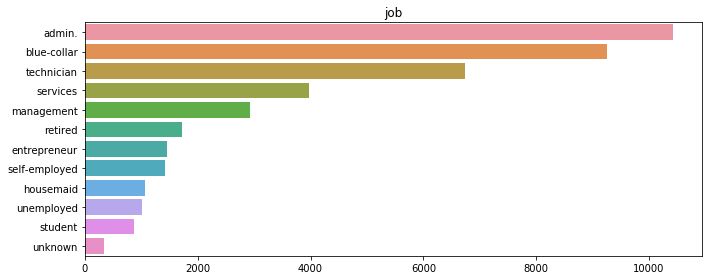

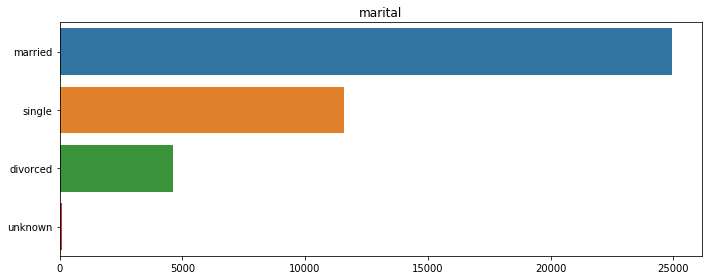

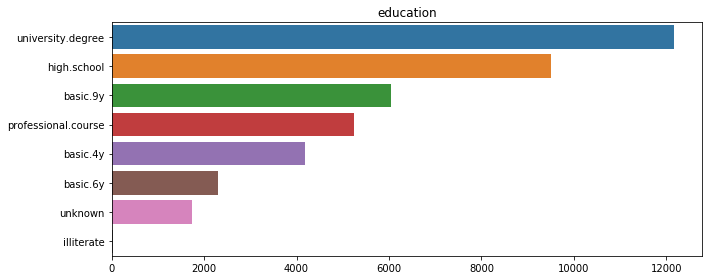

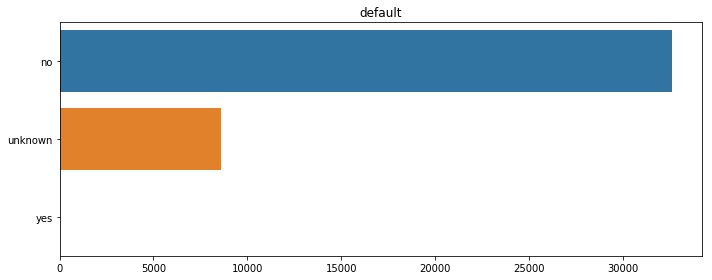

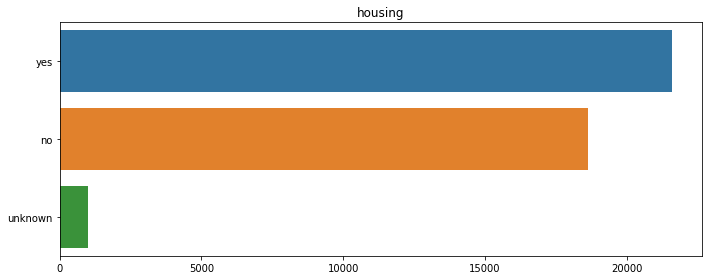

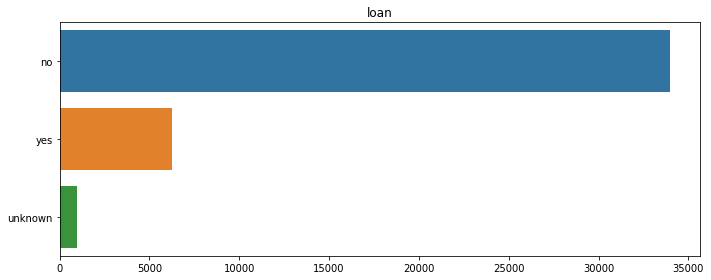

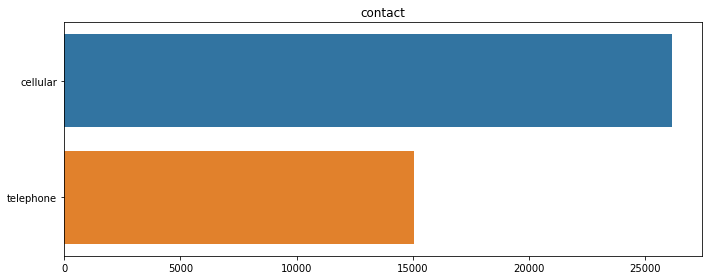

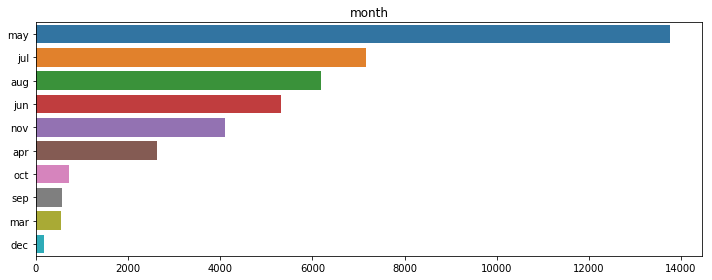

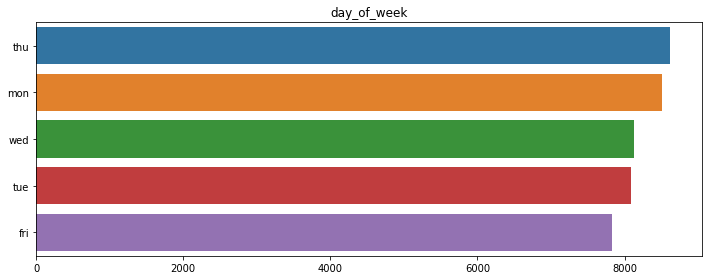

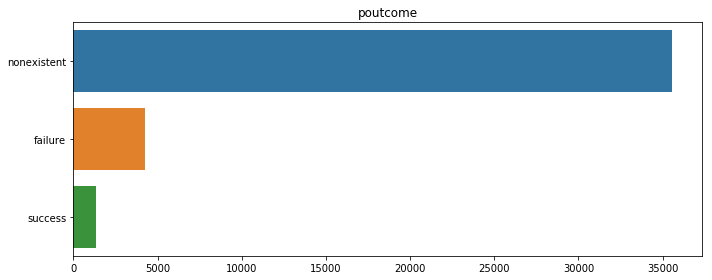

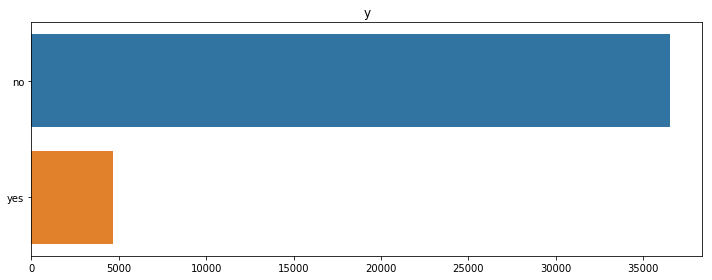

In [10]:
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','month', 'day_of_week', 'poutcome', 'y']
for cate in categorical:
    plt.figure(figsize=(10,4))
    sns.barplot(df[cate].value_counts().values, df[cate].value_counts().index)
    plt.title(cate)
    plt.tight_layout()

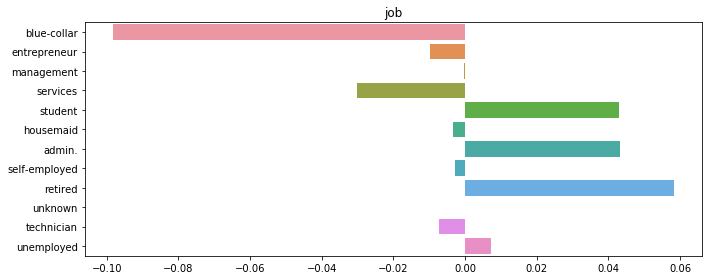

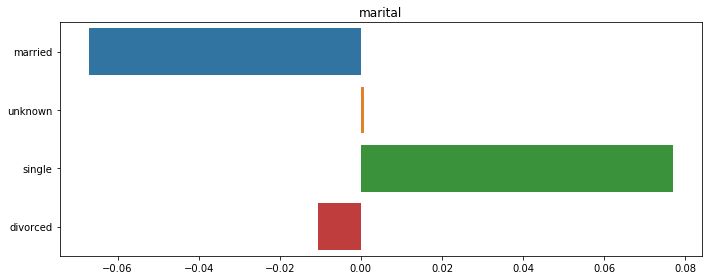

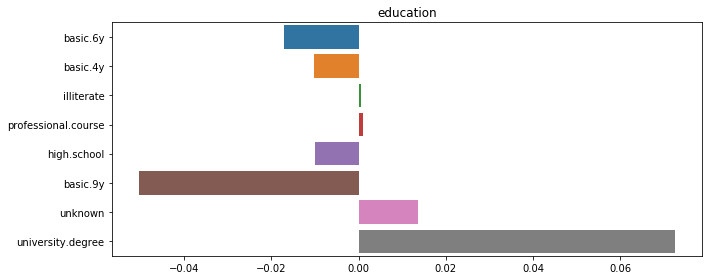

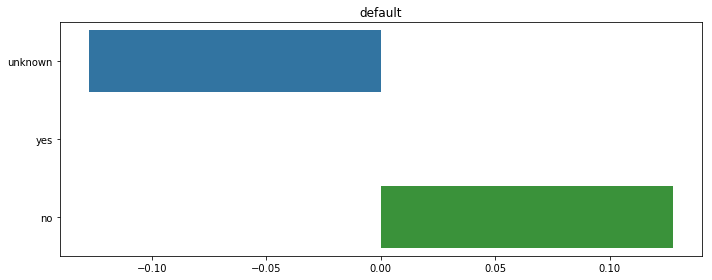

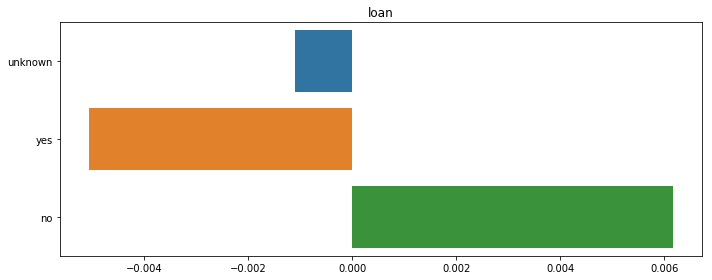

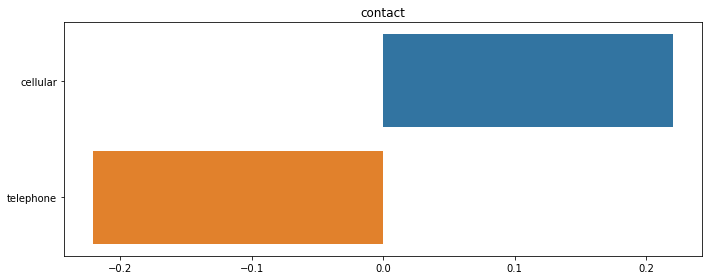

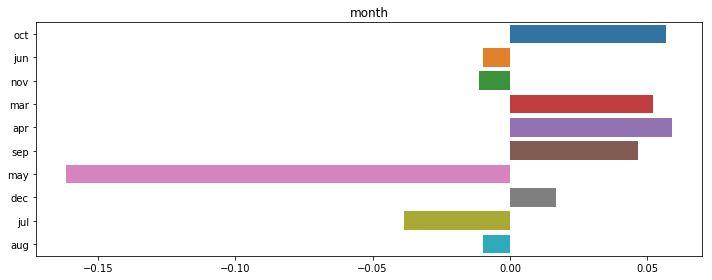

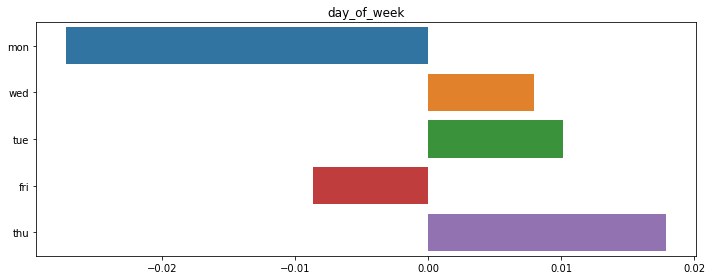

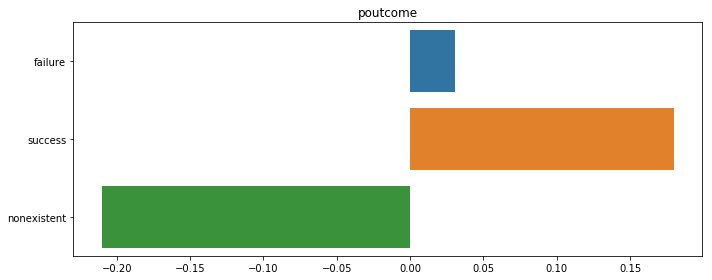

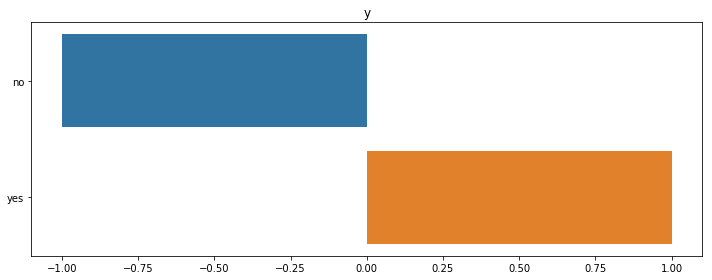

In [11]:
# Normalized distribution of each class per feature and plotted difference between positive and negative frequencies. 
# Positive values imply this category favors clients that will subscribe 
# negative values categories that favor not buying the product.
categorcial_variables = ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day_of_week', 'poutcome','y']
for col in categorcial_variables:
    #Returns counts of unique values for each outcome for each feature.
    pos_counts = df.loc[df.y.values == 'yes', col].value_counts() 
    neg_counts = df.loc[df.y.values == 'no', col].value_counts()
    
#     print(pos_counts, neg_counts)
    all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
#     print(all_counts)
    #Counts of how often each outcome was recorded.
    freq_pos = (df.y.values == 'yes').sum()
    freq_neg = (df.y.values == 'no').sum()
    
    pos_counts = pos_counts.to_dict()
    neg_counts = neg_counts.to_dict()
    
    all_index = list(all_counts)
    all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]

    plt.figure(figsize=(10,4))
    sns.barplot(all_counts, all_index)
    plt.title(col)
    plt.tight_layout()

In [14]:
## Creating new variables (variable name + '_un') to capture the information if the missing values are at random or is there
## a pattern in the missing values.
significant_cat_variables = ['education','job','housing','loan']
for var in significant_cat_variables:
    #df[var + '_un'] = 0
    #df[var + '_un'][df[var]=='unknown'] = 1
    #FIXME one-line coding
    df[var + '_un'] = (df[var] == 'unknown').astype(int)

In [15]:
def cross_tab(df,f1,f2):
    jobs=list(df[f1].unique())
    edu=list(df[f2].unique())
    dataframes=[]
    for e in edu:
        dfe=df[df[f2]==e]
        dfejob=dfe.groupby(f1).count()[f2]
        dataframes.append(dfejob)
    xx=pd.concat(dataframes,axis=1)
    xx.columns=edu
    xx=xx.fillna(0)
    return xx

### Mode application

In [16]:
# 'job' is influenced by the 'education' of a person
# we can infer 'job' based on the education of the person, can use the job to predict the education.
cross_tab(df,'job','education')

,basic.4y,high.school,basic.6y,basic.9y,professional.course,unknown,university.degree,illiterate
admin.,77,3329,151,499,363,249,5753,1.0
blue-collar,2318,878,1426,3623,453,454,94,8.0
entrepreneur,137,234,71,210,135,57,610,2.0
housemaid,474,174,77,94,59,42,139,1.0
management,100,298,85,166,89,123,2063,0.0
retired,597,276,75,145,241,98,285,3.0
self-employed,93,118,25,220,168,29,765,3.0
services,132,2682,226,388,218,150,173,0.0
student,26,357,13,99,43,167,170,0.0
technician,58,873,87,384,3320,212,1809,0.0


In [12]:
df['job'][df['age']>60].value_counts()

retired          678
housemaid         54
admin.            47
technician        34
management        30
unknown           21
blue-collar       20
self-employed      9
entrepreneur       8
unemployed         7
services           2
Name: job, dtype: int64

Inferring education from jobs : From the cross-tabulation, it can be seen that people with management jobs usually have a university degree. Hence wherever 'job' = management and 'education' = unknown, we can replace 'education' with 'university.degree'. Similarly, 'job' = 'services' --> 'education' = 'high.school' and 'job' = 'housemaid' --> 'education' = 'basic.4y'.

Inferring jobs from education : If 'education' = 'basic.4y' or 'basic.6y' or 'basic.9y' then the 'job' is usually 'blue-collar'. If 'education' = 'professional.course', then the 'job' = 'technician'.

Inferring jobs from age: As we see, if 'age' > 60, then the 'job' is 'retired,' which makes sense.

While imputing the values for job and education, we were cognizant of the fact that the correlations should make real world sense. If it didn't make real world sense, we didn't replace the missing values.

In [13]:
df.loc[(df['age']>60) & (df['job']=='unknown'), 'job'] = 'retired'
df.loc[(df['education']=='unknown') & (df['job']=='management'), 'education'] = 'university.degree'
df.loc[(df['education']=='unknown') & (df['job']=='services'), 'education'] = 'high.school'
df.loc[(df['education']=='unknown') & (df['job']=='housemaid'), 'education'] = 'basic.4y'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.4y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.6y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.9y'), 'job'] = 'blue-collar'
df.loc[(df['job']=='unknown') & (df['education']=='professional.course'), 'job'] = 'technician'

In [14]:
cross_tab(df,'job','education')

,basic.4y,high.school,basic.6y,basic.9y,professional.course,unknown,university.degree,illiterate
admin.,77.0,3329,151.0,499.0,363.0,249.0,5753,1.0
blue-collar,2366.0,878,1448.0,3654.0,453.0,454.0,94,8.0
entrepreneur,137.0,234,71.0,210.0,135.0,57.0,610,2.0
housemaid,516.0,174,77.0,94.0,59.0,0.0,139,1.0
management,100.0,298,85.0,166.0,89.0,0.0,2186,0.0
retired,601.0,276,75.0,145.0,243.0,112.0,286,3.0
self-employed,93.0,118,25.0,220.0,168.0,29.0,765,3.0
services,132.0,2832,226.0,388.0,218.0,0.0,173,0.0
student,26.0,357,13.0,99.0,43.0,167.0,170,0.0
technician,58.0,873,87.0,384.0,3330.0,212.0,1809,0.0


In [15]:
jobhousing = cross_tab(df,'job','housing')
jobhousing

,no,yes,unknown
job,,,
admin.,4636,5559,227
blue-collar,4362,4752,241
entrepreneur,641,779,36
housemaid,491,540,29
management,1363,1490,71
retired,789,908,44
self-employed,641,740,40
services,1818,2050,101
student,381,471,23


In [16]:
jobloan=cross_tab(df,'job','loan')
jobloan

,no,yes,unknown
job,,,
admin.,8485,1710,227
blue-collar,7730,1384,241
entrepreneur,1214,206,36
housemaid,877,154,29
management,2414,439,71
retired,1452,245,44
self-employed,1186,195,40
services,3267,601,101
student,710,142,23


We are again using cross-tabulation between 'house' and 'job' and between 'loan' and 'job.' Our hypothesis is that housing loan status (Yes or No) should be in the proportion of each job category. Hence using the prior known distribution of the housing loan for each job category, the house loan for unknown people will be predicted such that the prior distribution (% House = Yes's and No's for each job category remains the same). Similarly, we have filled the missing values in the 'loan' variable.

In [17]:
def fillhousing(df,jobhousing):
    """Function for imputation via cross-tabulation to fill missing values for the 'housing' categorical feature"""
    jobs=['housemaid','services','admin.','blue-collar','technician','retired','management','unemployed','self-employed','entrepreneur','student']
    house=["no","yes"]
    for j in jobs:
        ind=df[np.logical_and(np.array(df['housing']=='unknown'),np.array(df['job']==j))].index
        mask=np.random.rand(len(ind))<((jobhousing.loc[j]['no'])/(jobhousing.loc[j]['no']+jobhousing.loc[j]['yes']))
        ind1=ind[mask]
        ind2=ind[~mask]
        df.loc[ind1,"housing"]='no'
        df.loc[ind2,"housing"]='yes'
    return df

In [18]:
def fillloan(df,jobloan):
    """Function for imputation via cross-tabulation to fill missing values for the 'loan' categorical feature"""
    jobs=['housemaid','services','admin.','blue-collar','technician','retired','management','unemployed','self-employed','entrepreneur','student']
    loan=["no","yes"]
    for j in jobs:
        ind=df[np.logical_and(np.array(df['loan']=='unknown'),np.array(df['job']==j))].index
        mask=np.random.rand(len(ind))<((jobloan.loc[j]['no'])/(jobloan.loc[j]['no']+jobloan.loc[j]['yes']))
        ind1=ind[mask]
        ind2=ind[~mask]
        df.loc[ind1,"loan"]='no'
        df.loc[ind2,"loan"]='yes'
    return df

In [19]:
df = fillhousing(df,jobhousing)

In [20]:
df = fillloan(df,jobloan)

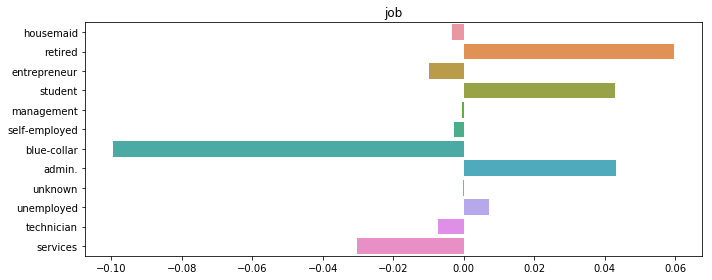

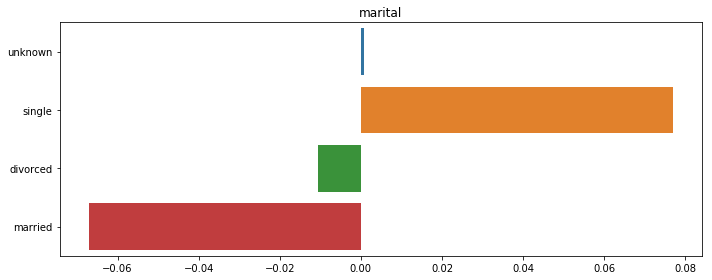

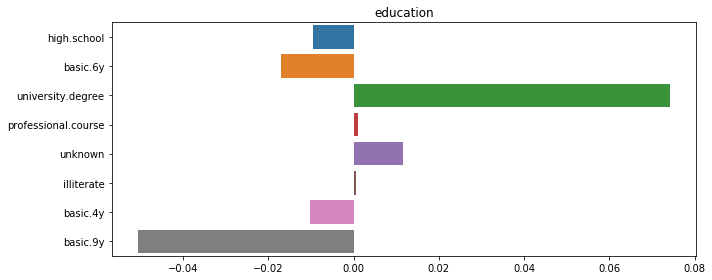

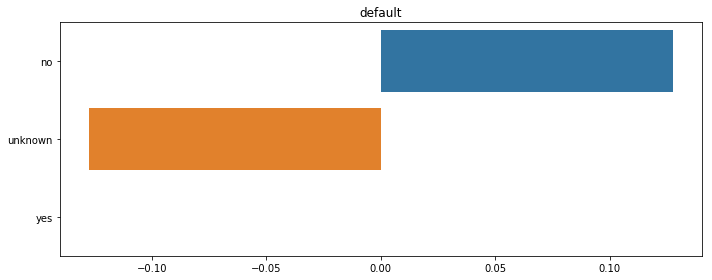

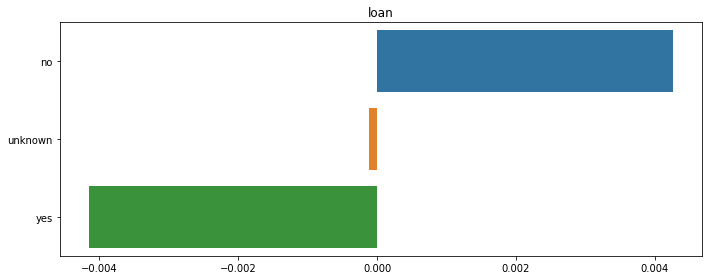

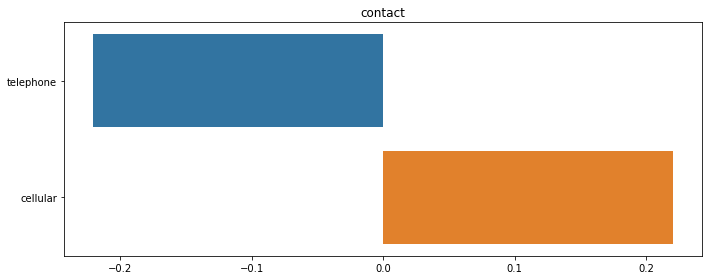

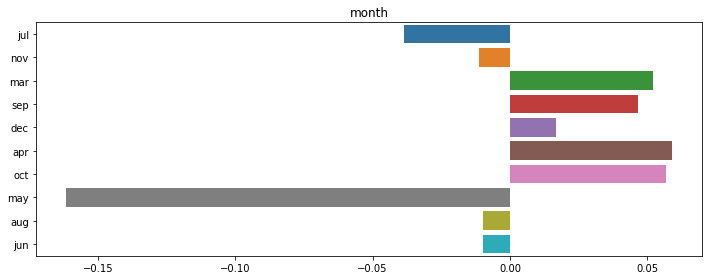

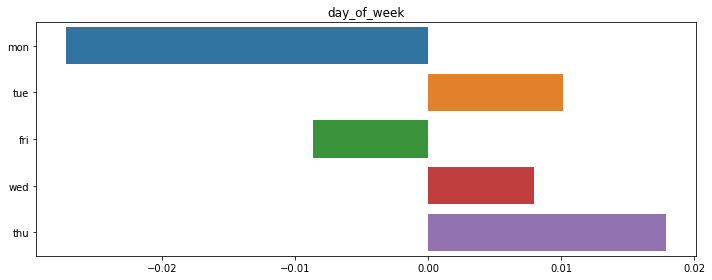

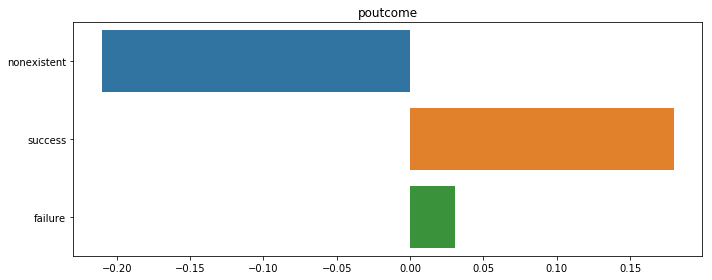

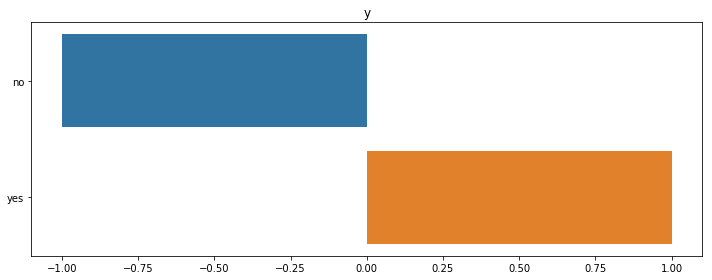

In [21]:
categorcial_variables = ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day_of_week', 'poutcome','y']
for col in categorcial_variables:
    #Returns counts of unique values for each outcome for each feature.
    pos_counts = df.loc[df.y.values == 'yes', col].value_counts() 
    neg_counts = df.loc[df.y.values == 'no', col].value_counts()
    
#     print(pos_counts, neg_counts)
    all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
#     print(all_counts)
    #Counts of how often each outcome was recorded.
    freq_pos = (df.y.values == 'yes').sum()
    freq_neg = (df.y.values == 'no').sum()
    
    pos_counts = pos_counts.to_dict()
    neg_counts = neg_counts.to_dict()
    
    all_index = list(all_counts)
    all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]

    plt.figure(figsize=(10,4))
    sns.barplot(all_counts, all_index)
    plt.title(col)
    plt.tight_layout()

# Values in numerical data


In [22]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,education_un,job_un,housing_un,loan_un
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.042027,0.008012,0.024036,0.024036
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.200653,0.089152,0.153163,0.153163
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000,0.000000,0.000000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000,0.000000,0.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000,0.000000,0.000000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000,1.000000,1.000000,1.000000


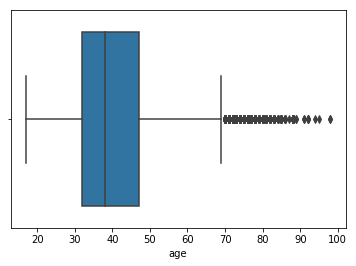

In [29]:
# Boxplot for 'age'
g = sns.boxplot(x=df["age"])

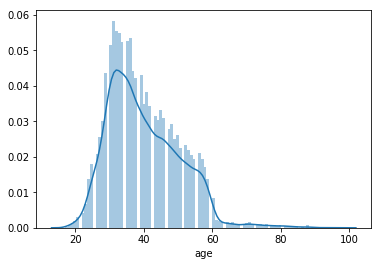

In [30]:
# Distribution of Age
sns.distplot(df.age, bins=100)

- Missing Values: From the source of the data (U.C. Irvine ML Repository), we're told that the missing values, or NaNs, are encoded as '999'. From the above table, it is clear that only 'pdays' has missing values. Moreover, a majority of the values for 'pdays' are missing.

- Outliers: Outliers are defined as 1.5 x Q3 value (75th percentile). From the above table, it can be seen that only 'age' and 'campaign' have outliers as max('age') and max('campaign') > 1.5Q3('age') and >1.5Q3('campaign') respectively.

But we also see that the value of these outliers are not so unrealistic (max('age')=98 and max('campaign')=56). Hence, we need not remove them since the prediction model should represent the real world. This improves the generalizability of the model and makes it robust for real world situations. The outliers, therefore, are not removed.

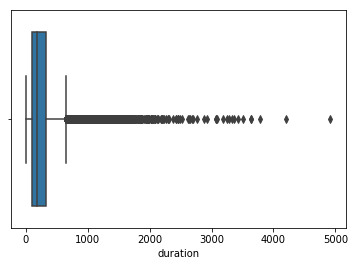

In [32]:
# Boxplot for 'duration'
g = sns.boxplot(x=df["duration"])


In [23]:
def drawhist(df,feature):
    plt.hist(df[feature])
    

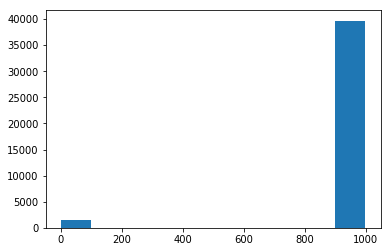

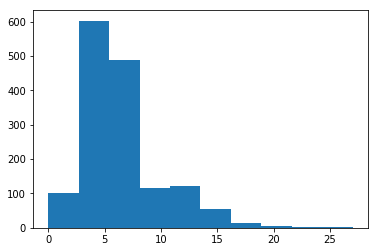

In [24]:
drawhist(df,'pdays') 
plt.show()

plt.hist(df.loc[df.pdays != 999, 'pdays']) # not NaN
plt.show()


In [25]:
pd.crosstab(df['pdays'],df['poutcome'], values=df['age'], aggfunc='count', normalize=True)

poutcome,failure,nonexistent,success
pdays,,,
0,0.000000,0.000000,0.000364
1,0.000000,0.000000,0.000631
2,0.000000,0.000000,0.001481
3,0.000097,0.000000,0.010561
4,0.000049,0.000000,0.002816
5,0.000097,0.000000,0.001020
6,0.000607,0.000000,0.009396
7,0.000364,0.000000,0.001093
8,0.000146,0.000000,0.000291


In [26]:
df['pdays_missing'] = 0
df['pdays_less_5'] = 0
df['pdays_greater_15'] = 0
df['pdays_bet_5_15'] = 0
df['pdays_missing'][df['pdays']==999] = 1
df['pdays_less_5'][df['pdays']<5] = 1
df['pdays_greater_15'][(df['pdays']>15) & (df['pdays']<999)] = 1
df['pdays_bet_5_15'][(df['pdays']>=5)&(df['pdays']<=15)]= 1
df_dropped_pdays = df.drop('pdays', axis=1);

In [27]:
df_with_dummies=pd.get_dummies(df_dropped_pdays)

Drop one of the dummy variables as for $n$ categories we only need $n$-1 dummy variables.

In [33]:
def dropfeature(df,f):
    """Drops one of the dummy variables."""
    df=df.drop(f,axis=1)
    return df

In [34]:
features_dropped = ['default_no','housing_no','loan_no','y_no','marital_single','contact_cellular',
                    'education_unknown','job_unknown','housing_unknown','loan_unknown', 'pdays_less_5']
df_clean = dropfeature(df_with_dummies, features_dropped)

In [35]:
def drawheatmap(df):
    '''Builds the heat map for the given data'''
    f, ax = plt.subplots(figsize=(15, 15))
    sns.heatmap(df.corr(method='spearman'), annot=False, cmap='coolwarm')
    
def drawhist(df,feature):
    '''Draws an histogram for a feature in a data frame (df)'''
    plt.hist(df[feature])

def functionreplace(df,fea,val1,val2):
    '''Replaces value (val1) with value (val2) in the data frame (df) for a feature (fea)'''
    df[fea].replace(val1,val2)
    return df

def drawbarplot(df,x,y):
    '''Draws a bar plot for a given feature x and y in a data frame'''
    sns.barplot(x=x, y=y, data=df)

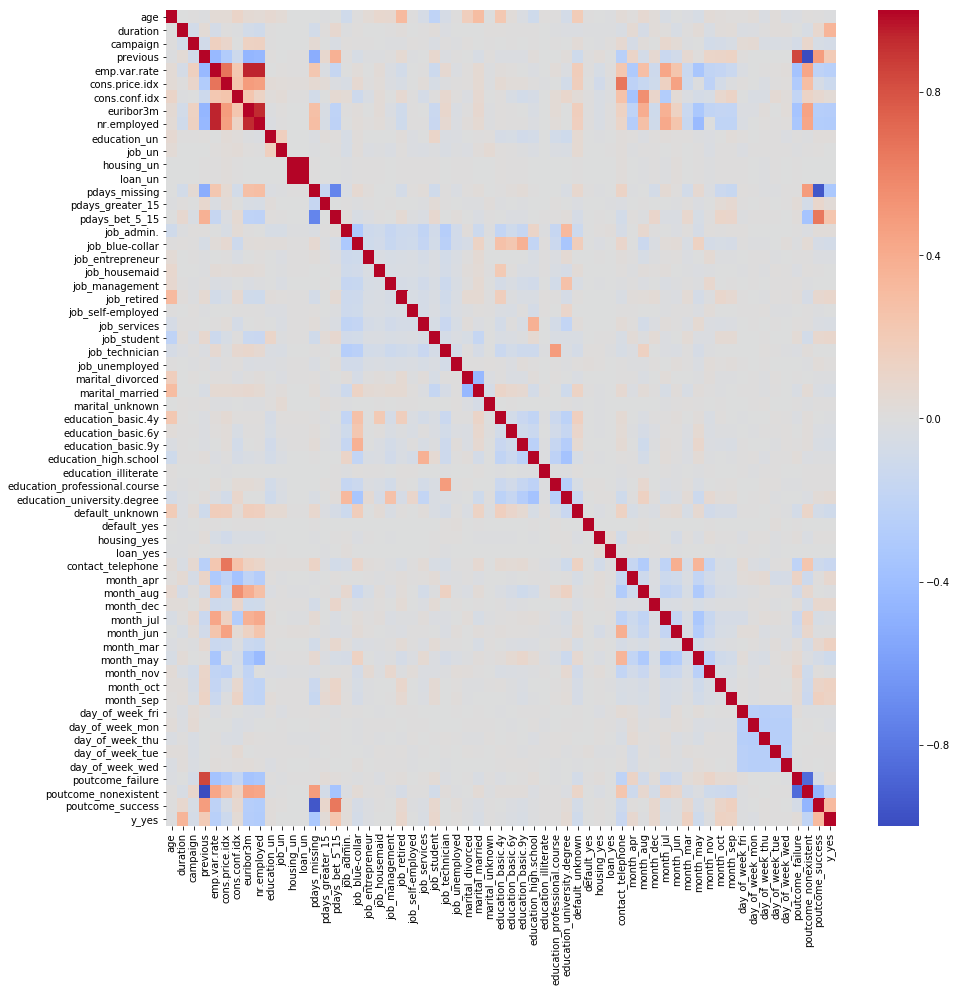

In [36]:
drawheatmap(df_clean)

In [38]:
def getmeanauc(aucs,model):
    ''' Calculates the mean AUC for all the cross-validated samples and computes the value of C (Regularization Parameter) 
    for which max mean auc is obtained'''
    #Initialize empty array to hold mean AUC values.
    meanauc = []
    maxmean = 0 #Initial value for maximum mean AUC
    models_with_1_param = ['Logistic_Regression' , 'Ada_Boost']
    models_with_2_params = ['Decision_Tree' , 'Random_Forest', 'Grad_Boost']
    for c in aucs: #For loop to append AUC value to meanauc array.
        meanauc.append(np.mean(aucs[c]))
        if maxmean < np.mean(aucs[c]):
            maxmean = np.mean(aucs[c]) #Adjust value of maxmean
            cval = c
    if model in models_with_1_param:
        print("C value for max auc is: ",cval)
        print("Max Mean Auc corresponding to the optimal value of C = ", maxmean)
        return meanauc,cval
    if model in models_with_2_params:
        listSL=cval.split('L')
        splitval=int(listSL[0]) #Stores minimum split value for max AUC
        leafval=int(listSL[1]) #Stores minimum leaf value for max AUC
        print("min_sample_split value for max auc is:",splitval)
        print("min_sample_leaf value for max auc is:",leafval)
        print("Max mean AUC corresponding to optimal leaf and split value = ",maxmean)
        return meanauc,splitval,leafval

def plot_mean_auc_LR(aucs,cs, label):
    '''Plots different values of mean auc versus the hyperparameter C'''
    plt.plot(np.log10(cs),aucs, label = label )
    plt.xlabel("C (Regularization Parameter)")
    plt.ylabel("Mean AUC")
    plt.legend()
        
def plotfeatureimportances(train, importance):
    '''Plots feature importance in a sorted order and shows the most significant variables at the top'''
    X = list(train.columns)
    X.remove('y_yes')
    feature_importance_df = pd.DataFrame(data = importance, index = X, columns=['coefficient_values'])
    feature_importance_df['sort'] = feature_importance_df.coefficient_values.abs()
    sorted_feature_imp_df = feature_importance_df.sort_values(by='sort', ascending=False).drop('sort', axis=1)
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 15)
    sns.barplot(np.array(sorted_feature_imp_df.coefficient_values), np.array(sorted_feature_imp_df.index.values))
    plt.title('Feature Importances')
    plt.xlabel('Coefficients')
    plt.ylabel('Feature Names')
    
def plotfeatureimp(fl,col):
    '''Plots the feature importance of all the independent variables in the model'''
    f=plt.figure(figsize=(10,15))
    plt.barh(range(len(fl)),fl)
    plt.yticks(range(len(col[:-1])),col[:-1])
    
def plotAUCDTRF(aucs,leafs,splits):
    '''Plots AUC for each value of Leaf and Split combination'''
    for i in range(len(splits)):
        plt.plot(leafs,aucs[len(leafs)*i:len(leafs)*i+len(leafs)], label = 'Split value= ' + str(splits[i]))
    plt.legend()
    plt.xlabel('Leaf Values')
    plt.ylabel('Mean AUC')
    
def plot_mean_auc_Ada_Boost(aucs, estimators, label):
    '''Plots different values of mean auc versus the Estimators for AdaBoosting'''
    plt.plot(estimators,aucs, label = label )
    plt.xlabel("Estimators")
    plt.ylabel("Mean AUC")
    plt.legend()

In [39]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_clean, train_size=0.8, random_state=5)
print('Original:', (df_clean.y_yes).mean(), 'Train:', (train.y_yes).mean(), 'Test:', (test.y_yes).mean())

train, test = train_test_split(df_clean, train_size=0.8, stratify=df_clean.y_yes.values, random_state=5)
print('Original:', (df_clean.y_yes).mean(), 'Train:', (train.y_yes).mean(), 'Test:', (test.y_yes).mean())

Original: 0.11265417111780131 Train: 0.11068285280728377 Test: 0.12053896576839039
Original: 0.11265417111780131 Train: 0.11265553869499241 Test: 0.11264870114105366


In [40]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
def LRmodel(train , validate , c, l_1 = False):
    '''Fits the Logistic Regression Model on the training data set and calculates evaluation metrics on the validation set
    with the regularization constant C'''
    X=list(train.columns) #Create list of column labels from training data
    Y='y_yes'
    X.remove('y_yes')
    scaler = StandardScaler().fit(train[X]) #Standardize features by removing the mean and scaling to unit variance
    train_std = scaler.transform(train[X]) #Compute the mean and standard deviation on training set
    validate_std = scaler.transform(validate[X])
    xtrain = train_std
    ytrain = train[Y]
    xval = validate_std
    yval = validate[Y]
    if l_1:
        logreg = LogisticRegression(C = c, penalty= 'l1') #Apply logistic regression on L1 penalty
    else:
        logreg = LogisticRegression(C=c)
    logreg.fit(xtrain,ytrain)
    pred_proba_val = logreg.predict_proba(xval)[:,1]
    auc = metrics.roc_auc_score(yval, pred_proba_val)
    fpr, tpr, threshold = metrics.roc_curve(yval, pred_proba_val)
    accuracy = metrics.accuracy_score(yval, logreg.predict(xval))
    return auc,logreg.coef_, tpr, fpr, threshold, accuracy

In [54]:
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn import preprocessing

def kfoldlr(dataset , k , cs, l1_penalty = False):
    '''Performs kfold cross validation for the dataset and also searches for the optimal regularixation parameter '''
    aucs = {}
    kf = KFold(k, shuffle=True) #Provides indices to split data in train/test sets
#     print(kf.get_n_splits(dataset))
    for train_idx, vali_idx in kf.split(dataset): #For loop to extract and append AUC values to array from training data
        cv_train,cv_validate=dataset.iloc[train_idx,:], dataset.iloc[vali_idx,:]
        for c in cs:
            auc, f_imp, tpr, fpr, threshold, accuracy = LRmodel(cv_train,cv_validate,c, l_1 = l1_penalty)
            if c in aucs:
                aucs[c].append(auc)
            else:
                aucs[c]=[]
                aucs[c].append(auc)
    return aucs

In [55]:
cs = np.logspace(-4,5,10)
aucs_l2=kfoldlr(train , 5 , cs)
aucs_l1=kfoldlr(train , 5 , cs, l1_penalty= True)

/home/thanhtinh/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/thanhtinh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()
/home/thanhtinh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':
/home/thanhtinh/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/thanhtinh/anaconda3/lib/python3.7/site-package

/home/thanhtinh/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/thanhtinh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()
/home/thanhtinh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':
/home/thanhtinh/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/thanhtinh/anaconda3/lib/python3.7/site-package

/home/thanhtinh/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/thanhtinh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()
/home/thanhtinh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':
/home/thanhtinh/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/thanhtinh/anaconda3/lib/python3.7/site-package

/home/thanhtinh/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/thanhtinh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()
/home/thanhtinh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':
/home/thanhtinh/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/thanhtinh/anaconda3/lib/python3.7/site-package

/home/thanhtinh/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/thanhtinh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()
/home/thanhtinh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':
/home/thanhtinh/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/thanhtinh/anaconda3/lib/python3.7/site-package

/home/thanhtinh/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/thanhtinh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()
/home/thanhtinh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':
/home/thanhtinh/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/thanhtinh/anaconda3/lib/python3.7/site-package

/home/thanhtinh/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/thanhtinh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()
/home/thanhtinh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':
/home/thanhtinh/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/thanhtinh/anaconda3/lib/python3.7/site-package

/home/thanhtinh/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/thanhtinh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()
/home/thanhtinh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':
/home/thanhtinh/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/thanhtinh/anaconda3/lib/python3.7/site-package

/home/thanhtinh/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/thanhtinh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()
/home/thanhtinh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':
/home/thanhtinh/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/thanhtinh/anaconda3/lib/python3.7/site-package

In [56]:
means_l2,cval_l2 = getmeanauc(aucs_l2,'Logistic_Regression')
means_l1,cval_l1 = getmeanauc(aucs_l1,'Logistic_Regression')

C value for max auc is:  1.0
Max Mean Auc corresponding to the optimal value of C =  0.9342738544039308
C value for max auc is:  1.0
Max Mean Auc corresponding to the optimal value of C =  0.9341759451985814


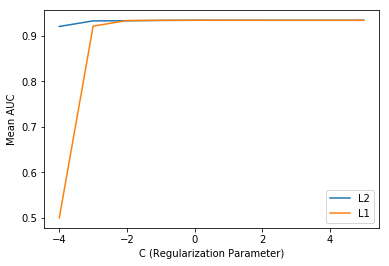

In [57]:
plot_mean_auc_LR(means_l2,cs, label = 'L2')
plot_mean_auc_LR(means_l1,cs, label = 'L1')

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
def DTmodel(train,validation,leaf=1,split=2):
    '''Decision Tree model to fit the train set to decision tree and predict AUC on test/validation set'''
    X=list(train.columns) #Create list of column labels from training data
    Y='y_yes'
    X.remove('y_yes')
    xtrain=train[X] 
    ytrain=train[Y]
    xval=validation[X]
    yval=validation[Y]
    
    #Runs sklearn's decision tree algorithm on the training data with min leaf size 1 and split size 2
    dt=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=leaf,min_samples_split=split) 
    
    #Train the model
    dt.fit(xtrain,ytrain)
    predict_proba_val=dt.predict_proba(xval)[:,1] #Predict class probabilities of input validation data
    auc=metrics.roc_auc_score(yval,predict_proba_val) #Compute ROC AUC from prediction scores
    fpr,tpr,threshold=metrics.roc_curve(yval,predict_proba_val) #Compute ROC
    accuracy=metrics.accuracy_score(yval,dt.predict(xval)) #Compute subset accuracy classification score
    
    #Feature importances. The higher the score, the more important the feature. 
    #Computed as the normalized total reduction of the criterion brought by that feature.
    imp=dt.feature_importances_ 
    return auc,imp,tpr,fpr,threshold,accuracy

In [59]:
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn import preprocessing

def kfoldDTRF(dataset, k,split,leaf,model):
    '''K-fold validation function for Decision tree and Random Forest. K=5, hence input data set is divided 
    into 5 datasets out of which 4 of them will be used to fit model and one to validate the model in each iteration '''
    aucs={}
    kf=KFold(k, shuffle=True) #Provides indices to split data in train/test sets
    for train_idx, vali_idx in kf.split(dataset): 
        cv_train,cv_validate=dataset.iloc[train_idx,:], dataset.iloc[vali_idx,:]
        for sp in split:
            for lf in leaf:
                if model=='DT':
                    #Run decision tree function above based on user input
                    core,fimp,tpr,fpr,threshold,accuracy=DTmodel(cv_train,cv_validate,lf,sp)
                if model=='RF':
                    #Run random forest function below based on user input
                    core,fimp,tpr,fpr,threshold,accuracy=randomforrest(cv_train,cv_validate,lf,sp)
                
                if str(sp)+"L"+str(lf) in aucs:
                    aucs[str(sp)+"L"+str(lf)].append(core)
                else:
                    aucs[str(sp)+"L"+str(lf)]=[]
                    aucs[str(sp)+"L"+str(lf)].append(core)
    return aucs

In [60]:
split = np.geomspace(10,2000,num=10,dtype=int)
leaf = np.geomspace(5,200,num=10,dtype=int)
aucsdt=kfoldDTRF(train,5,split,leaf,'DT')

min_sample_split value for max auc is: 341
min_sample_leaf value for max auc is: 132
Max mean AUC corresponding to optimal leaf and split value =  0.9398621530090893


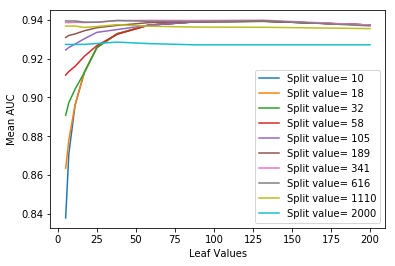

In [61]:
meanauc,splitval,leafval=getmeanauc(aucsdt,'Decision_Tree')
plotAUCDTRF(meanauc,leaf,split)